# Homework_02_numpy_matplotlib

## 1. 数值计算 numpy
### （1）对于一个存在在数组，如何添加一个用0填充的边界?
例如对一个二维矩阵
```
10, 34, 54, 23
31, 87, 53, 68
98, 49, 25, 11
84, 32, 67, 88
```

In [1]:
import numpy as np
ar=np.array([[10,34,54,23],[31, 87, 53, 68],[98, 49, 25, 11],[84, 32, 67, 88]])
ar=np.pad(ar , pad_width=1 , mode='constant' , constant_values=0)
print(ar)

[[ 0  0  0  0  0  0]
 [ 0 10 34 54 23  0]
 [ 0 31 87 53 68  0]
 [ 0 98 49 25 11  0]
 [ 0 84 32 67 88  0]
 [ 0  0  0  0  0  0]]


此处利用pad函数直接进行填充，填充方法使用constant,即可沿着边缘填充，厚度可自行给定。

### （2）创建一个 5x5的矩阵，并设置值1,2,3,4落在其对角线下方位置

In [2]:
import numpy as np
ar0=np.arange(1,5)
ar0=np.diag(ar0,k=-1)
print(ar0)

[[0 0 0 0 0]
 [1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]]


此处用diag函数，k为负数代表在对角线下方，k为正数代表在对角线上方。

### （3）创建一个8x8 的矩阵，并且设置成国际象棋棋盘样式（黑可以用0, 白可以用1）

In [3]:
import numpy as np

ar=np.ones((8,8),dtype=int)
ar[::2,1:9:2]=0  #先作用于列
ar[1:9:2,::2]=0  #再作用于行
print(ar)

[[1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]]


通过先固定行，将所有列变换，然后再将所有行变换，其中每次变换的步长为2
### （4）求解线性方程组
给定一个方程组，如何求出其的方程解。有多种方法，分析各种方法的优缺点（最简单的方式是消元方）。

例如
```
3x + 4y + 2z = 10
5x + 3y + 4z = 14
8x + 2y + 7z = 20
```

In [4]:
import numpy as np
# 3x + 4y + 2z = 10
# 5x + 3y + 4z = 14
# 8x + 2y + 7z = 20

#用内置函数solve解决，需注意等式右边矩阵br应为列向量
a1=[[3,4,2],[5,3,4],[8,2,7]]
b1=[10,14,20]
ar1=np.array(a1)
br=np.array(b1)
r1=np.linalg.solve(ar1,br.T)
print(r1)

#运用数学原理，X=A^(-1)B，所以需要先求A的逆矩阵，再用A的逆矩阵点乘B
a2=[[3,4,2],[5,3,4],[8,2,7]]
b2=[10,14,20]
ar2=np.linalg.inv(a2)
r2=ar2.dot(b2)
print(r2)

[ 6.  0. -4.]
[ 6.  0. -4.]


运用了两种方法来求解线性方程组，第一种用solve函数直接代入计算，第二种运用数学原理X=A^(-1)B，所以需要先求A的逆矩阵，再用A的逆矩阵点乘B。
### （5） 翻转一个数组（第一个元素变成最后一个）

In [5]:
import numpy as np
ar=np.arange(1,65).reshape(8,8)
ls=ar.shape
#print(type(ls))   #获得函数返回类型
n=len(ls)         #获得数组维度
for i in range(n):
    ar=np.flip(ar,axis=i)
print(ar)
print('\n可以将任意维度数组进行操作。')

[[64 63 62 61 60 59 58 57]
 [56 55 54 53 52 51 50 49]
 [48 47 46 45 44 43 42 41]
 [40 39 38 37 36 35 34 33]
 [32 31 30 29 28 27 26 25]
 [24 23 22 21 20 19 18 17]
 [16 15 14 13 12 11 10  9]
 [ 8  7  6  5  4  3  2  1]]

可以将任意维度数组进行操作。


此处，为了让所有维度的数组都可以进行翻转操作，我使用了循环然后将每个轴进行翻转，这样就可以实现任意维度数组的操作。
### （6） 产生一个十乘十随机数组，并且找出最大和最小值

In [6]:
import numpy as np

ar=np.random.randint(-1000,1000 ,(10,10))
print(ar)
print(f'最大值：{ar.max()}    最小值：{ar.min()}')

[[  212   159  -454   350   -61    91   707   189  -134    59]
 [  -57  -609  -315  -515  -797   268  -843  -264  -697 -1000]
 [ -101  -232  -290    -4   -79  -957  -428   874  -889   453]
 [  805   -22  -218  -604  -630   604   500  -357  -140   664]
 [  767   318   387   590   899  -751   736  -880   587  -401]
 [ -736  -325   137  -784   164  -451   987   409   508   452]
 [  661   417  -471  -141   585   217   331   737  -470   991]
 [ -751  -271   942   481   351   947  -208   661   428  -987]
 [ -780  -979   215   582  -190   534  -532   239   932  -342]
 [  664  -677   108  -171    20   104   -64   -50  -349  -552]]
最大值：991    最小值：-1000


## 2. Matplotlib
### （1） 画出一个二次函数，同时画出梯形法求积分时的各个梯形

请输入函数(不用输入y，例如直接输入x**2)：x**2+2
请输入等分份数：100


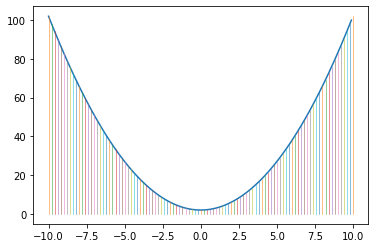

In [7]:
import numpy as np
from matplotlib import pyplot as plt
def hanshu():
    y=input('请输入函数(不用输入y，例如直接输入x**2)：')
    y1=y.replace('x','x1')
    return y,y1

x=np.arange(-10,10,0.1)
y,y1=hanshu()
y=eval(y)
plt.plot(x,y)    #绘制函数

n=int(input('请输入等分份数：'))
x2=np.arange(-10,10.1,20/n)
for i in x2:     #绘制等分梯形
    x1=np.array([i,i])
    y2=eval(y1)
    a=y2[0]
    y3=np.array([0,a])
    plt.plot(x1,y3,linewidth='0.5')
plt.show()

梯形是用两点(x1,0)与(x1,y)两点绘制的直线。  
其中绘图部分比较好解决，但是在引入直接输入函数部分比较困难，花了比较多的时间用于解决。  
因为要用两次输入的函数，但是不能使用户输入两次函数，所以想到了用replace代替自变量，使其变为两个函数。  
因为第一次是用这个库画图，所以这道题用时还挺久的，不过对于函数以及方法还比较熟悉了。
### （2） 绘制函数 $f(x) = sin^2(x - 2) e^{-x^2}$
需要画出标题，x，y轴。x的取值范围是[0, 2]

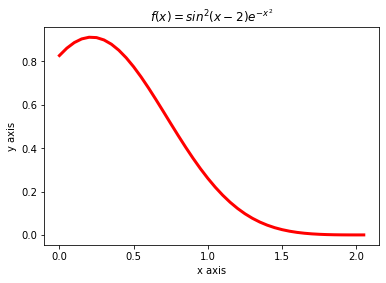

In [8]:
import numpy as np
from matplotlib import pyplot as plt

x=np.arange(0,2.1,0.05)
y=(np.sin((x-2))**2)*(np.e**(-(x**2)))
plt.title(r'$f(x) = sin^2(x - 2) e^{-x^2}$')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.plot(x,y,linewidth='3',color= 'r')
plt.show()


在绘制函数的时候，画了很多次图像都与给出的不一样，检查了很久才发现表达式少了个'*'
### （3） 模拟一个醉汉在二维空间上的随机漫步。
一维：x轴表示步子，y轴表示游走的位置；  
二维：x，y分别是游走的位置；  
三维：其中z比表示步子。

请输入醉汉走步数量：10


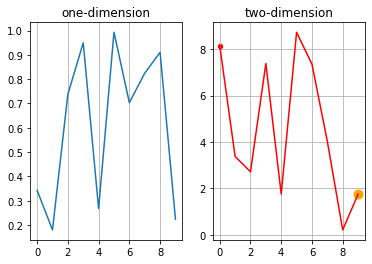

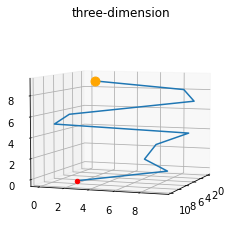

In [9]:
import numpy as np
from matplotlib import pyplot as plt

#一维
plt.subplot(1,2,1)
np.random.seed()
n=int(input('请输入醉汉走步数量：'))
x=np.arange(0,n)
y=np.random.rand(n)
plt.title('one-dimension')
plt.grid(axis='x')
plt.plot(x,y)

#二维
plt.subplot(1,2,2)
np.random.seed()
x=np.arange(n)
y=n*(np.random.rand(n))
plt.scatter(x[0],y[0],c='r',s=20)
plt.scatter(x[-1],y[-1],c='orange',s=80)
plt.title('two-dimension')
plt.plot(x,y,c='r')
plt.grid()

#三维
fig=plt.figure()
a= fig.gca(projection='3d')
z=np.arange(n)
x=n*(np.random.rand(n))
y=n*(np.random.rand(n))
a.scatter(x[0],y[0],z[0],c='r',s=20)
a.scatter(x[-1],y[-1],z[-1],c='orange',s=80)
a.view_init(elev=6, azim=20)
plt.title('three-dimension')
a.plot(x,y,z)
plt.show()

增加了网格以区分一维和二维，将二维的x,y轴的数值大小范围设置为一致，以表示醉汉的位置。  
另外，虽然三维的我试过很多种视角，但是感觉还是不能看得很清楚。
其中，将起点用红色标出，终点用橙色进行标出。